In [7]:
import numpy as np
import pandas as pd

In [8]:
#covid=pd.read_csv('G:/YU - DATA ANALYTICS/Part 5 by Hashmat/Corona NLP.csv',encoding="ISO-8859-1")
twitter=pd.read_excel('Keyhole_bchpca_twitter_posts_(NhT23H)_20201208-20220101.xlsx')

In [9]:
twitter.head(10)

,Date & Time (GMT -0500),Caption,Likes,Retweets,Replies,Engagement,Impressions,Engagement Rate,Video Views,Type,URL,Tags
0,2021-12-06 06:45:22,Starts tomorrow! Please join us virtually on D...,1,0,NaN,1,NaN,NaN,NaN,Text,https://twitter.com/BCHPCA/status/146782246943...,NaN
1,2021-12-02 06:52:06,RT @KristaElan: On Dec 8 I am giving a talk on...,9,5,NaN,14,NaN,NaN,NaN,Retweet,https://twitter.com/KristaElan/status/14628458...,NaN
2,2021-11-30 06:45:12,Please join us virtually on December 8th for t...,1,0,NaN,1,NaN,NaN,NaN,Text,https://twitter.com/BCHPCA/status/146564810027...,NaN
3,2021-11-29 16:00:15,Click on link below for more information:\nhtt...,1,0,NaN,1,NaN,NaN,NaN,Text,https://twitter.com/BCHPCA/status/146542539679...,NaN
4,2021-11-25 06:45:37,Please join us virtually on December 7th for t...,2,0,NaN,2,NaN,NaN,NaN,Text,https://twitter.com/BCHPCA/status/146383626622...,NaN
5,2021-11-22 06:45:21,Please join us virtually on December 7th and 8...,0,0,NaN,0,NaN,NaN,NaN,Text,https://twitter.com/BCHPCA/status/146274903599...,NaN
6,2021-11-18 09:11:13,RT @c_grief: In support of grieving children a...,16,10,NaN,26,NaN,NaN,NaN,Retweet,https://twitter.com/c_grief/status/14612945219...,NaN
7,2021-11-18 09:11:05,RT @AWC_Grief: It's #ChildrensGriefAwarenessDa...,11,5,NaN,16,NaN,NaN,NaN,Retweet,https://twitter.com/AWC_Grief/status/146128814...,NaN
8,2021-11-18 09:10:37,RT @CanadianHPCAssn: Today is #ChildrensGriefA...,8,3,NaN,11,NaN,NaN,NaN,Retweet,https://twitter.com/CanadianHPCAssn/status/146...,NaN
9,2021-11-15 09:49:37,RT @CanadianHPCAssn: We are so excited to welc...,4,1,NaN,5,NaN,NaN,NaN,Retweet,https://twitter.com/CanadianHPCAssn/status/146...,NaN


In [10]:
twitter.shape

(92, 12)

In [11]:
twitter2=twitter.drop(columns=['Likes','Retweets','Replies','Engagement','Impressions','Engagement Rate','Video Views','Type','URL','Tags'])

In [12]:
twitter2

,Date & Time (GMT -0500),Caption
0,2021-12-06 06:45:22,Starts tomorrow! Please join us virtually on D...
1,2021-12-02 06:52:06,RT @KristaElan: On Dec 8 I am giving a talk on...
2,2021-11-30 06:45:12,Please join us virtually on December 8th for t...
3,2021-11-29 16:00:15,Click on link below for more information:\nhtt...
4,2021-11-25 06:45:37,Please join us virtually on December 7th for t...
...,...,...
87,2021-03-07 23:27:12,"RT @GriefAllianceCA: March 8, 2021 marks one y..."
88,2021-02-25 00:25:17,LGBT Care for older adults during end of life ...
89,2021-02-25 00:04:15,RT @c_grief: Grieving children and youth can o...
90,2021-01-18 12:17:13,RT @c_grief: Winter months can be triggering t...


In [13]:
twitter2.rename(columns={'Date & Time (GMT -0500)':'date','Caption':'text'},inplace=True)
twitter2

,date,text
0,2021-12-06 06:45:22,Starts tomorrow! Please join us virtually on D...
1,2021-12-02 06:52:06,RT @KristaElan: On Dec 8 I am giving a talk on...
2,2021-11-30 06:45:12,Please join us virtually on December 8th for t...
3,2021-11-29 16:00:15,Click on link below for more information:\nhtt...
4,2021-11-25 06:45:37,Please join us virtually on December 7th for t...
...,...,...
87,2021-03-07 23:27:12,"RT @GriefAllianceCA: March 8, 2021 marks one y..."
88,2021-02-25 00:25:17,LGBT Care for older adults during end of life ...
89,2021-02-25 00:04:15,RT @c_grief: Grieving children and youth can o...
90,2021-01-18 12:17:13,RT @c_grief: Winter months can be triggering t...


In [14]:
twitter2.dtypes

date    object
text    object
dtype: object

In [15]:
twitter2.isnull().sum()

date    0
text    1
dtype: int64

In [16]:
twitter2.dropna(subset=['text'], inplace=True)

In [17]:
twitter2.isnull().sum()

date    0
text    0
dtype: int64

In [18]:
twitter2.duplicated().sum()
twitter2

,date,text
0,2021-12-06 06:45:22,Starts tomorrow! Please join us virtually on D...
1,2021-12-02 06:52:06,RT @KristaElan: On Dec 8 I am giving a talk on...
2,2021-11-30 06:45:12,Please join us virtually on December 8th for t...
3,2021-11-29 16:00:15,Click on link below for more information:\nhtt...
4,2021-11-25 06:45:37,Please join us virtually on December 7th for t...
...,...,...
87,2021-03-07 23:27:12,"RT @GriefAllianceCA: March 8, 2021 marks one y..."
88,2021-02-25 00:25:17,LGBT Care for older adults during end of life ...
89,2021-02-25 00:04:15,RT @c_grief: Grieving children and youth can o...
90,2021-01-18 12:17:13,RT @c_grief: Winter months can be triggering t...


In [19]:
import nltk  #NLTK is a leading platform for building Python programs to work with human language data. 

In [20]:
twitter2['num_characters'] = twitter2['text'].apply(len)  #How to find the size of text in dataframe in python

In [21]:
twitter2

,date,text,num_characters
0,2021-12-06 06:45:22,Starts tomorrow! Please join us virtually on D...,248
1,2021-12-02 06:52:06,RT @KristaElan: On Dec 8 I am giving a talk on...,140
2,2021-11-30 06:45:12,Please join us virtually on December 8th for t...,284
3,2021-11-29 16:00:15,Click on link below for more information:\nhtt...,252
4,2021-11-25 06:45:37,Please join us virtually on December 7th for t...,271
...,...,...,...
87,2021-03-07 23:27:12,"RT @GriefAllianceCA: March 8, 2021 marks one y...",140
88,2021-02-25 00:25:17,LGBT Care for older adults during end of life ...,84
89,2021-02-25 00:04:15,RT @c_grief: Grieving children and youth can o...,139
90,2021-01-18 12:17:13,RT @c_grief: Winter months can be triggering t...,144


In [22]:
twitter2['num_words']=twitter2['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
twitter2.head()

,date,text,num_characters,num_words
0,2021-12-06 06:45:22,Starts tomorrow! Please join us virtually on D...,248,44
1,2021-12-02 06:52:06,RT @KristaElan: On Dec 8 I am giving a talk on...,140,30
2,2021-11-30 06:45:12,Please join us virtually on December 8th for t...,284,52
3,2021-11-29 16:00:15,Click on link below for more information:\nhtt...,252,41
4,2021-11-25 06:45:37,Please join us virtually on December 7th for t...,271,50


In [24]:
twitter2['num_sentences'] = twitter2['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
twitter2

,date,text,num_characters,num_words,num_sentences
0,2021-12-06 06:45:22,Starts tomorrow! Please join us virtually on D...,248,44,3
1,2021-12-02 06:52:06,RT @KristaElan: On Dec 8 I am giving a talk on...,140,30,2
2,2021-11-30 06:45:12,Please join us virtually on December 8th for t...,284,52,3
3,2021-11-29 16:00:15,Click on link below for more information:\nhtt...,252,41,1
4,2021-11-25 06:45:37,Please join us virtually on December 7th for t...,271,50,3
...,...,...,...,...,...
87,2021-03-07 23:27:12,"RT @GriefAllianceCA: March 8, 2021 marks one y...",140,28,2
88,2021-02-25 00:25:17,LGBT Care for older adults during end of life ...,84,16,2
89,2021-02-25 00:04:15,RT @c_grief: Grieving children and youth can o...,139,25,2
90,2021-01-18 12:17:13,RT @c_grief: Winter months can be triggering t...,144,30,2


<AxesSubplot:xlabel='num_words', ylabel='Count'>

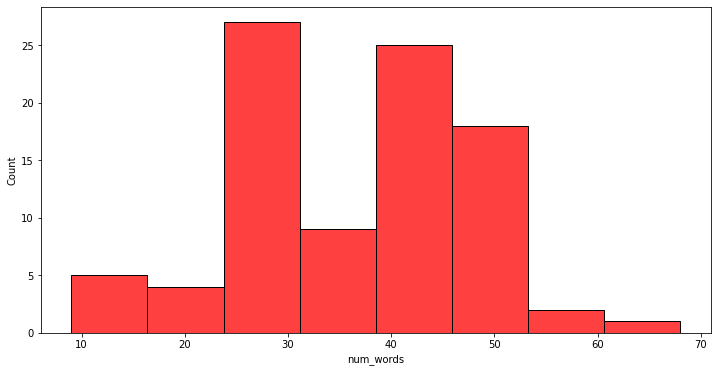

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(twitter2['num_words'],color='red')

<AxesSubplot:>

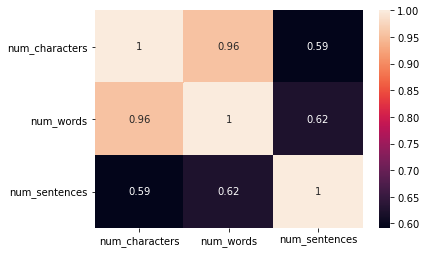

In [27]:
sns.heatmap(twitter2.corr(), annot=True)

# Data Preprocessing
#1.Lower case
#2.Tokenization
#3.Removing special characters
#4.Removing stop words and punctuation
#5.Stemming

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
import string as str
str.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [31]:
ps.stem('loving')

'love'

In [32]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in str.punctuation:
            y.append(i)        
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [33]:
(twitter2['text'][10])

'SAVE THE DATE!\n\nJoin us virtually on December 7th and 8th to learn about advanced serious illness planning and substitute decision making laws in BC. Provide the ultimate gift of peace of mind to you and your family.\n\nStay tuned for more information next week! '

In [34]:
transform_text(twitter2['text'][10])

'save date join us virtual decemb 7th 8th learn advanc seriou ill plan substitut decis make law bc provid ultim gift peac mind famili stay tune inform next week'

In [35]:
twitter2['transformed_text'] = twitter2['text'].apply(transform_text)
# pandas.DataFrame.apply
# Apply a function along an axis of the DataFrame.

In [36]:
twitter2.head()

,date,text,num_characters,num_words,num_sentences,transformed_text
0,2021-12-06 06:45:22,Starts tomorrow! Please join us virtually on D...,248,44,3,start tomorrow pleas join us virtual decemb 7t...
1,2021-12-02 06:52:06,RT @KristaElan: On Dec 8 I am giving a talk on...,140,30,2,rt kristaelan dec 8 give talk healthcar decisi...
2,2021-11-30 06:45:12,Please join us virtually on December 8th for t...,284,52,3,pleas join us virtual decemb 8th second day wi...
3,2021-11-29 16:00:15,Click on link below for more information:\nhtt...,252,41,1,click link inform http help us rais awar impor...
4,2021-11-25 06:45:37,Please join us virtually on December 7th for t...,271,50,3,pleas join us virtual decemb 7th first day win...


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=1600,height=680,min_font_size=3,background_color='white')

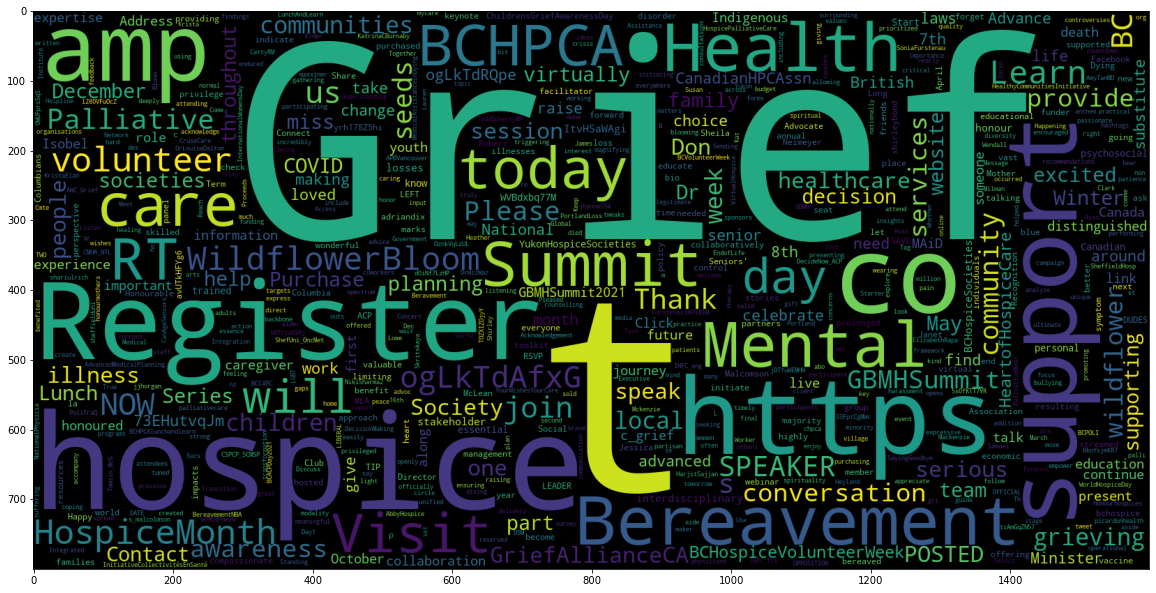

In [38]:
data = twitter2['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)

In [39]:
#